Comparing the number of words to the number of tokens in a paragraph.  

The number of words is typically less than the number of tokens because a tokenizer usually splits on spaces (like a word count would) but also splits punctuation and special characters into separate tokens.



In [1]:
from transformers import AutoTokenizer
import matplotlib.pyplot as plt
import re

c:\dev\book2LLM\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [2]:
# Cell 2: Define the function
def count_words_and_tokens(filename):
    tokenizer = AutoTokenizer.from_pretrained("sentence-transformers/all-MiniLM-L6-v2")
    with open(filename, 'r', encoding='utf-8') as file:
        paragraphs = []
        paragraph = []
        for line in file:
            if line.startswith("  "):
                paragraph.append(line.strip())
            elif paragraph:
                paragraphs.append(" ".join(paragraph))
                paragraph = []
        if paragraph:
            paragraphs.append(" ".join(paragraph))

        word_counts = []
        token_counts = []
        for i, paragraph in enumerate(paragraphs):
            words = len(re.findall(r'\b\w+\b', paragraph))  # count only sequences of alphabetic characters as words
            tokens = len(tokenizer.tokenize(paragraph))
            word_counts.append(words)
            token_counts.append(tokens)
            print(f"Paragraph {i+1}: {words} words, {tokens} tokens")


        return word_counts, token_counts

In [3]:
# Cell 3: Call the function
filename = 'data\BookFinal2023_noref.txt'  # replace with your file name
word_counts, token_counts = count_words_and_tokens(filename)


Token indices sequence length is longer than the specified maximum sequence length for this model (862 > 512). Running this sequence through the model will result in indexing errors


Paragraph 1: 676 words, 862 tokens
Paragraph 2: 781 words, 1015 tokens
Paragraph 3: 615 words, 865 tokens
Paragraph 4: 687 words, 1006 tokens
Paragraph 5: 534 words, 704 tokens
Paragraph 6: 660 words, 856 tokens
Paragraph 7: 692 words, 917 tokens
Paragraph 8: 872 words, 1211 tokens
Paragraph 9: 477 words, 644 tokens
Paragraph 10: 621 words, 819 tokens
Paragraph 11: 889 words, 1173 tokens
Paragraph 12: 510 words, 756 tokens
Paragraph 13: 1058 words, 1430 tokens
Paragraph 14: 826 words, 1219 tokens
Paragraph 15: 717 words, 928 tokens
Paragraph 16: 785 words, 1056 tokens
Paragraph 17: 935 words, 1263 tokens
Paragraph 18: 908 words, 1176 tokens
Paragraph 19: 640 words, 860 tokens
Paragraph 20: 995 words, 1430 tokens
Paragraph 21: 554 words, 732 tokens
Paragraph 22: 855 words, 1166 tokens
Paragraph 23: 683 words, 935 tokens
Paragraph 24: 710 words, 949 tokens
Paragraph 25: 759 words, 998 tokens
Paragraph 26: 1193 words, 1566 tokens
Paragraph 27: 851 words, 1117 tokens
Paragraph 28: 788 word

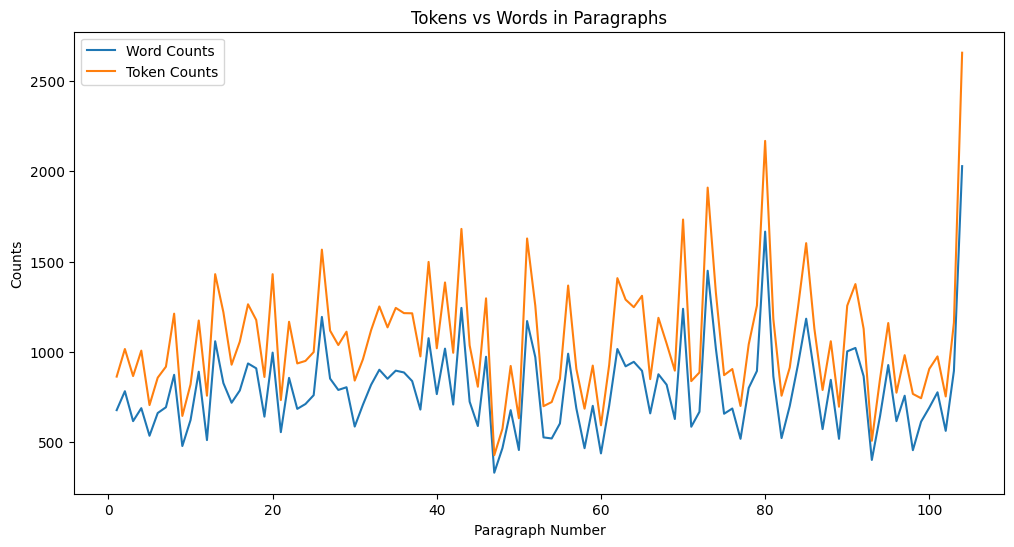

In [5]:
# Cell 4: Create line plot
plt.figure(figsize=(12,6))
plt.plot(range(1, len(word_counts) + 1), word_counts, label='Word Counts')
plt.plot(range(1, len(token_counts) + 1), token_counts, label='Token Counts')
plt.title('Tokens vs Words in Paragraphs')
plt.xlabel('Paragraph Number')
plt.ylabel('Counts')
plt.legend()
plt.show()